In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv(r"C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\UScomments.csv", on_bad_lines = "skip", low_memory=False)

In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
type(comments)

pandas.core.frame.DataFrame

In [5]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)

In [7]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [8]:
import nltk 

In [9]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Navneet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [13]:
sia.polarity_scores("MY FAN . attendance")["compound"]

0.4648

In [14]:
sentimen_scores = []

for comment in comments["comment_text"]:
    score = sia.polarity_scores(str(comment))["compound"]
    sentimen_scores.append(score)


In [15]:
sentimen_scores

[0.0,
 0.0,
 0.0,
 0.4648,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 -0.7717,
 0.0,
 0.2023,
 -0.3877,
 0.4404,
 0.0,
 0.5719,
 0.0772,
 0.0,
 0.6369,
 0.0085,
 -0.4466,
 0.1225,
 0.6486,
 -0.1027,
 0.8769,
 0.0,
 -0.5106,
 0.8283,
 -0.2883,
 0.982,
 0.4404,
 0.6841,
 0.0,
 0.0,
 0.6486,
 -0.9421,
 -0.3806,
 0.1376,
 0.2619,
 0.128,
 0.0,
 0.0,
 0.6642,
 0.0,
 -0.3818,
 0.9226,
 0.5859,
 0.1901,
 -0.656,
 -0.7758,
 -0.5423,
 0.6486,
 -0.4939,
 0.5627,
 -0.1027,
 0.0,
 -0.4767,
 0.9337,
 0.6579,
 -0.4574,
 0.0,
 0.5267,
 0.0,
 -0.9005,
 0.6369,
 0.9124,
 0.9112,
 0.7845,
 -0.5499,
 0.0,
 0.0,
 0.0,
 0.7249,
 0.0,
 0.2263,
 0.0,
 0.0772,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.0,
 -0.5423,
 -0.5994,
 -0.5574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2714,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.6841,
 0.0,
 0.5502,
 0.4404,
 0.5126,
 -0.7262,
 0.2732,
 -0.7578,
 0.3182,
 -0.2924,
 -0.2821,
 -0.5737,
 -0.6597,
 0.6979,
 0.3612,
 0.9117,
 0.1531,
 -0.947,
 -0.8062,
 -0.9457,
 0.0721,
 0.5994,
 -0.5996,
 -0.3857,
 0.0,

In [16]:
comments["polarity"] = sentimen_scores

In [17]:
comments.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000


3.. Worldcloud Analysis of your data

In [18]:
filter_pos = (comments["polarity"] >= 0.8) & (comments["polarity"] <= 1.0)

In [19]:
comments_positive = comments[filter_pos]

In [20]:
comments_positive.shape

(64310, 5)

In [21]:
filter_neg = (comments["polarity"] >= -1.0) & (comments["polarity"] <= -0.8)

In [22]:
comments_negative = comments[filter_neg]

In [23]:
comments_negative.shape

(16148, 5)

In [24]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [25]:
comments_positive["comment_text"]

24        I love Logan and Jake so much and thay are so ...
27        if you get allot of diss likes do you get on t...
29        I love you so much I love to meet you But I li...
45        This looks like a great video, but after you a...
57        Congrats Logan love u so much someday I would ...
                                ...                        
691312    Fabulous video, just so wonderful live.It's so...
691322    I love each and every version of this song. LP...
691324    Absolutely fabulous ! LP has the genius to ren...
691345                      Beautiful LP! You are gorgeous!
691356        No comments!  Enjoy!  Thanks!  Nice  weekend!
Name: comment_text, Length: 64310, dtype: object

In [26]:
type(comments_positive["comment_text"])

pandas.core.series.Series

In [27]:
total_positive_comments = " ".join(comments_positive["comment_text"])

In [28]:
total_positive_comments[0:1000]

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍 if you get allot of diss likes do you get on the top comments? lets see diss like this please I love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it bye This looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :) Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️ Well done I LOVE! You so much :D I am very happy for this man and we need to spread more love. United we stand, divided we fall. And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Rea

In [29]:
from wordcloud import WordCloud , STOPWORDS

In [30]:
set[(STOPWORDS)]

set[{'is', 'with', 'when', "why's", 'no', 'before', 'who', 'being', 'we', "hasn't", 'other', 'i', 'during', 'ought', 'their', 'by', 'my', "you're", 'are', 'whom', 'http', 'hence', 'again', 'them', "isn't", 'very', 'yourself', 'this', 'once', 'while', "let's", 'own', 'were', 'yours', "we'd", 'all', 'itself', 'am', 'a', 'its', 'you', 'any', 'him', 'above', 'because', "they've", 'r', "you've", 'had', 'for', 'such', "you'll", 'few', "haven't", 'against', 'not', 'theirs', "she'd", "i'm", "we've", 'over', 'what', 'cannot', 'could', "she'll", 'ours', 'therefore', 'did', "we'll", 'doing', 'have', "there's", 'get', 'herself', 'ever', "shouldn't", "wasn't", "didn't", 'in', 'than', 'about', "they'd", 'where', "who's", 'on', 'com', "she's", 'more', 'but', "mustn't", "i've", 'there', "doesn't", 'he', 'your', 'can', "i'll", 'too', 'at', 'how', "hadn't", 'just', 'nor', 'also', "that's", 'be', 'between', "i'd", "here's", 'our', 'since', 'down', 'those', 'here', 'these', 'each', "when's", 'after', 'wou

In [31]:
wordcloud_positive = WordCloud(stopwords = set(STOPWORDS)).generate(total_positive_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

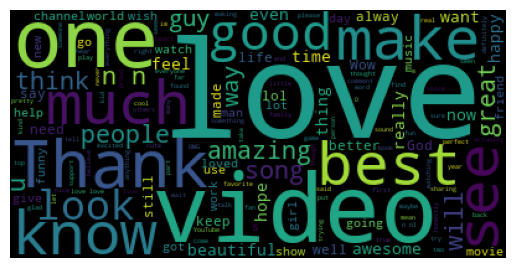

In [32]:
plt.imshow(wordcloud_positive)
plt.axis("off")

In [33]:
total_negative_comments = " ".join(comments_negative["comment_text"])

In [34]:
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_negative_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

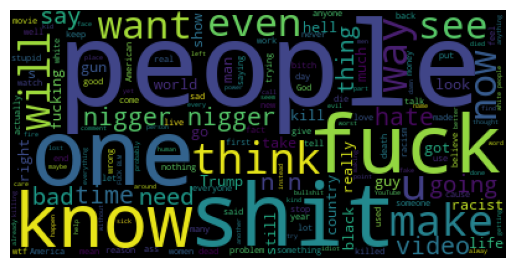

In [35]:
plt.imshow(wordcloud_negative)
plt.axis("off")

4.. Perform Emoji's Analysis

In [36]:
! pip install emoji==2.14.1

Defaulting to user installation because normal site-packages is not writeable


In [37]:
import emoji

In [38]:
emoji.__version__

'2.14.1'

In [39]:
comments.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000


In [40]:
emojis_info = emoji.emoji_list("trending 😉")

In [41]:
emojis_info

[{'match_start': 9, 'match_end': 10, 'emoji': '😉'}]

In [42]:
[item["emoji"] for item in emojis_info]

['😉']

In [43]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [44]:
all_emojis_found = []

for comment in comments["comment_text"]:
    emojis_info = emoji.emoji_list(comment)
    emojis_found = [item["emoji"] for item in emojis_info]
    all_emojis_found.extend(emojis_found)

In [45]:
all_emojis_found[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [46]:
len(all_emojis_found)

288867

In [47]:
from collections import Counter

In [48]:
emojis_count_list_top10 = Counter(all_emojis_found).most_common(10)

In [49]:
emojis_count_list_top10

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [50]:
emojis = [emoji for emoji, count in emojis_count_list_top10]
counts = [count for emoji, count in emojis_count_list_top10]

In [51]:
emojis

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']

In [52]:
counts

[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]

In [53]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [54]:
import plotly.graph_objs as go
from plotly.offline import iplot

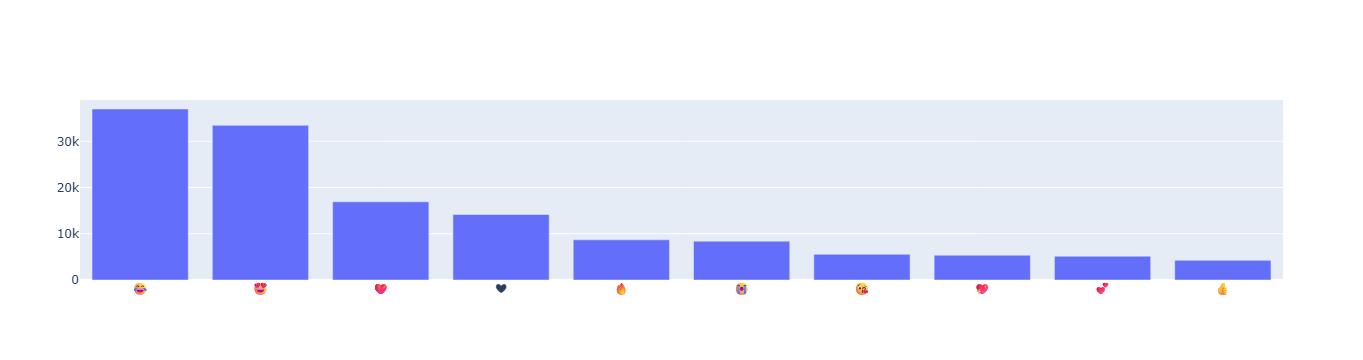

In [55]:
iplot([go.Bar(x = emojis , y = counts)])

In [56]:
import os

In [57]:
files = os.listdir(r"C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\additional_data")

In [58]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [59]:
files_csv = [file for file in files if ".csv" in file]

In [60]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [61]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [62]:
full_df = pd.DataFrame()
path = r"C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\additional_data"

for file in files_csv:
    current_df = pd.read_csv(path+"/"+file , encoding="iso-8859-1" , on_bad_lines="skip")

    full_df = pd.concat([full_df, current_df] , ignore_index=True)

In [63]:
full_df.shape

(375942, 16)

In [65]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [66]:
full_df = full_df.drop_duplicates()

In [67]:
full_df.shape

(339525, 16)

In [68]:
full_df[0:1000].to_csv(r"C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\youtube_sample.csv", index=False)

In [69]:
full_df[0:1000].to_json(r"C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\Export_Data\youtube_sample.json")

In [92]:
from sqlalchemy import create_engine

In [74]:
engine = create_engine(r"sqlite:///C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\Export_Data\youtube_sample.sqlite")

In [93]:
full_df[0:1000].to_sql("Users" , con=engine , if_exists="append")

1000

In [76]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [80]:
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [81]:
json_df = pd.read_json(r"C:\Users\Navneet\Desktop\Data Analyst Projects\1.. Youtube Data Analysis\additional_data\US_category_id.json")

In [91]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [89]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [90]:
json_df["items"][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [94]:
cat_dict = {}

for item in json_df["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]

In [95]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [96]:
full_df["category_name"] = full_df["category_id"].map(cat_dict)

In [97]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

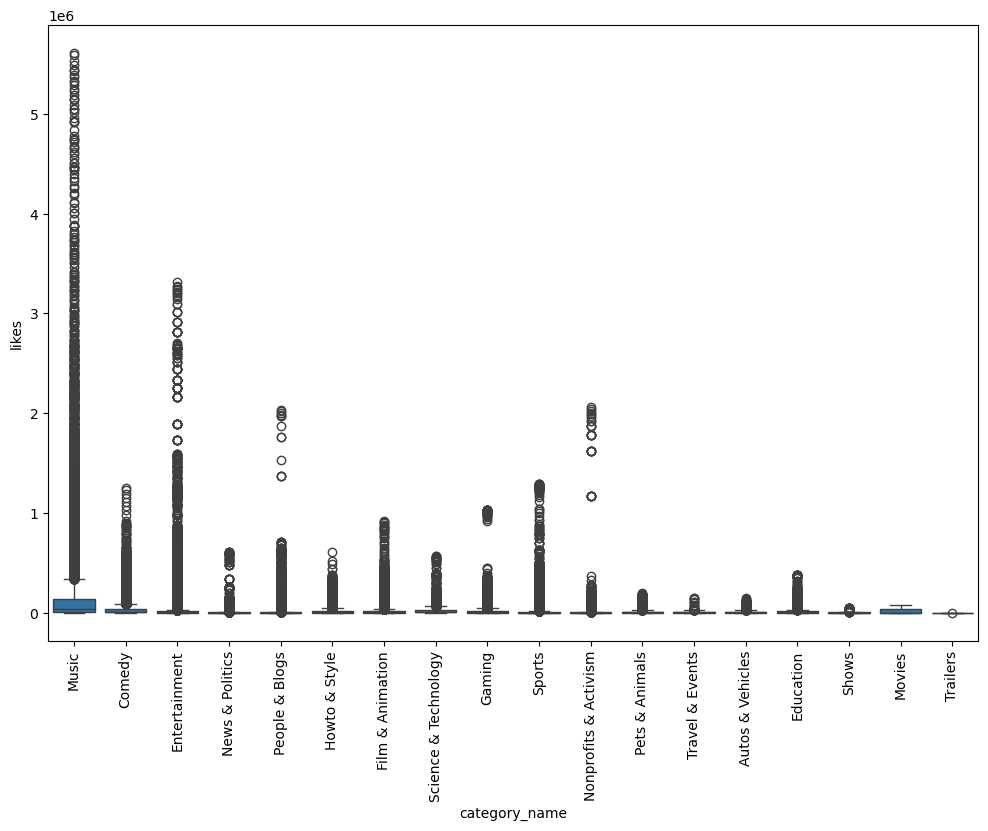

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(x="category_name", y= "likes", data=full_df)
plt.xticks(rotation="vertical")

In [102]:
full_df["like_rate"] = (full_df["likes"]/full_df["views"])*100
full_df["dislike_rate"] = (full_df["dislikes"]/full_df["views"])*100
full_df["comment_count_rate"] = (full_df["comment_count"]/full_df["views"])*100

In [103]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

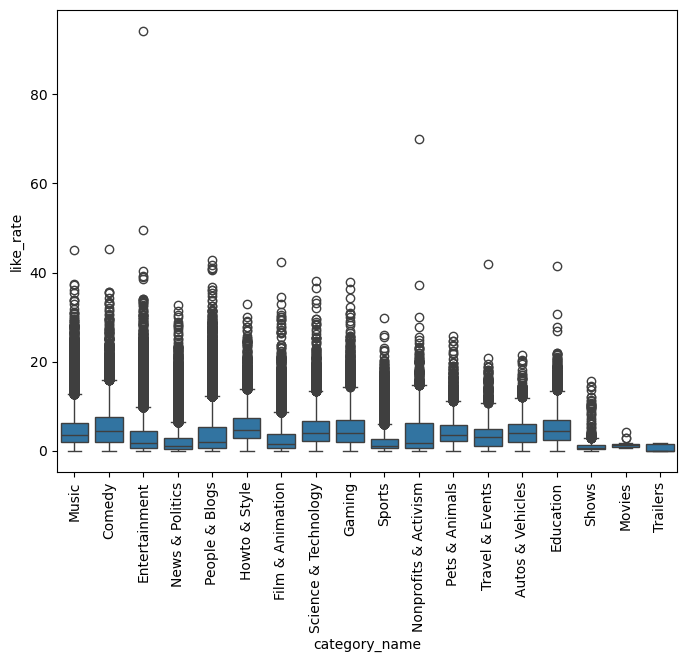

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(x="category_name", y= "like_rate", data=full_df)
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='views', ylabel='likes'>

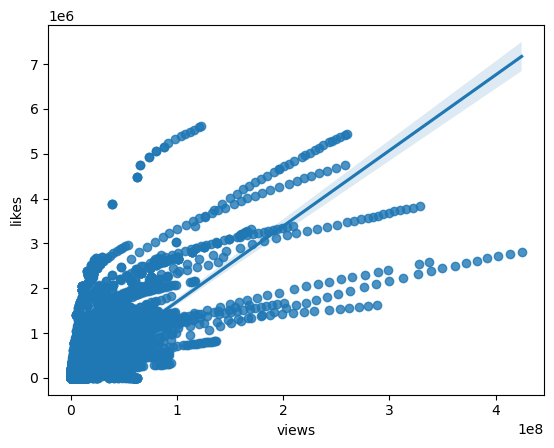

In [105]:
sns.regplot(x="views", y="likes", data=full_df)

In [106]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [108]:
full_df[["views", "likes", "dislikes"]].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

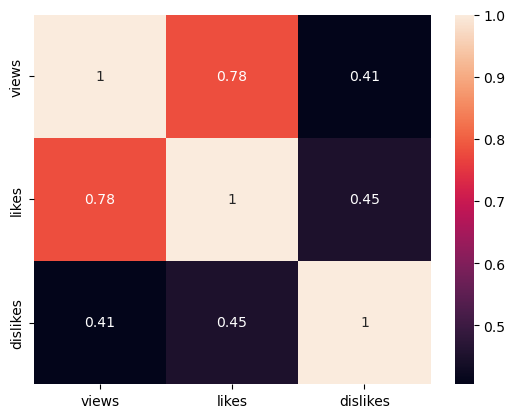

In [110]:
sns.heatmap(full_df[["views", "likes", "dislikes"]].corr(), annot=True)

In [111]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [112]:
full_df["channel_title"].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [115]:
cdf = full_df.groupby(["channel_title"]).size().sort_values(ascending=False).reset_index()

In [118]:
cdf = cdf.rename(columns={0:"total_videos"})

In [119]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [120]:
import plotly.express as px

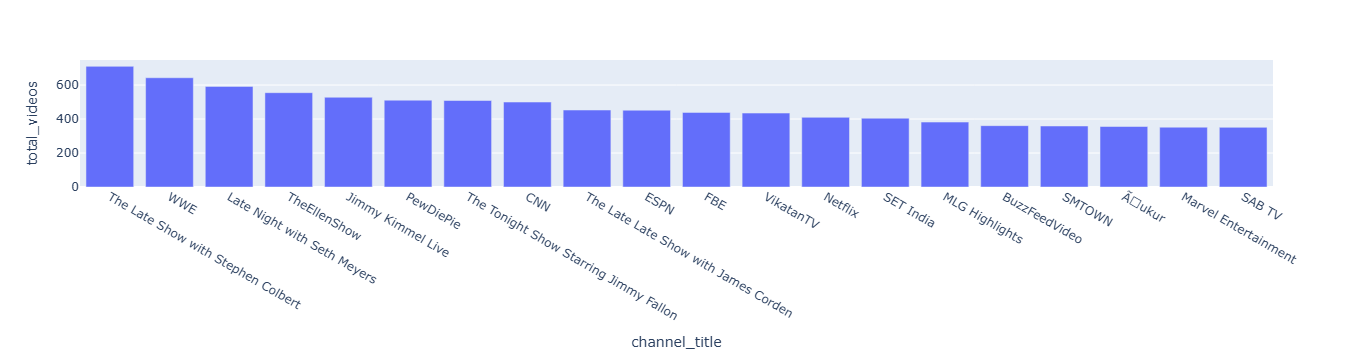

In [123]:
px.bar(data_frame=cdf[0:20], x="channel_title", y="total_videos")

In [124]:
full_df["title"][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [125]:
import string

In [126]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
len([char for char in full_df["title"][0] if char in string.punctuation])

4

In [130]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [131]:
sample = full_df[0:10000]

In [132]:
sample["count_punc"] = sample["title"].apply(punc_count)

In [133]:
sample["count_punc"]

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

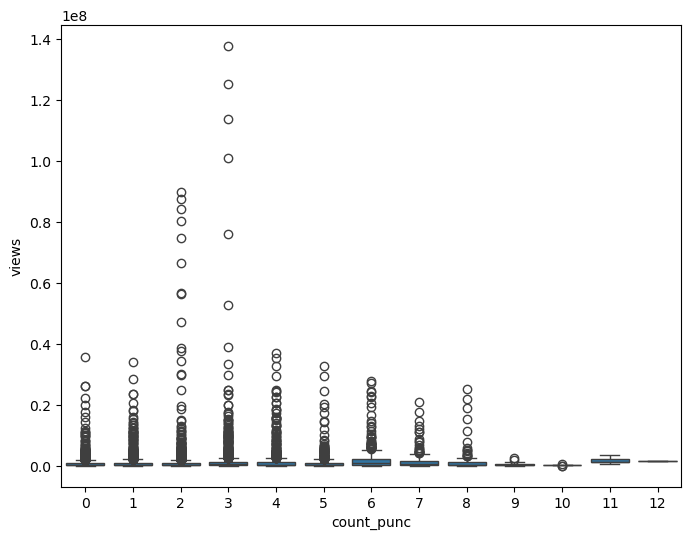

In [135]:
plt.figure(figsize=(8,6))
sns.boxplot(x="count_punc", y="views", data=sample)
plt.show()

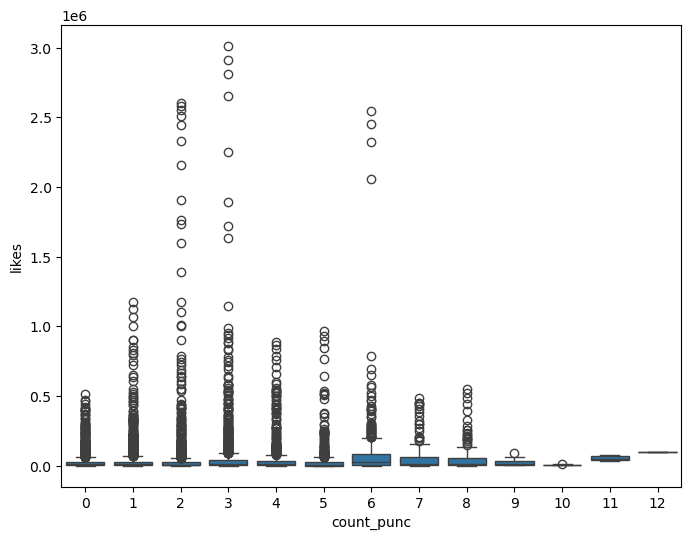

In [136]:
plt.figure(figsize=(8,6))
sns.boxplot(x="count_punc", y="likes", data=sample)
plt.show()